In [2]:
# Pacotes necessários
import pandas as pd
import numpy as np
import statistics as st
import seaborn as se
import statsmodels.stats.proportion as smp
from scipy import stats
from scipy.stats import t

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#DataFrames

In [ ]:
"""dfMicroDados =  pd.read_csv('/content/drive/Shared drives/Trabalho Estátistica/MICRODADOS_ENADE_2016.csv',sep=';',decimal=',')
dfMicroDados.shape
"""

In [4]:
dfConceito = pd.read_excel('/content/drive/Shared drives/Trabalho Estátistica/conceito_enade2016.xlsx')

In [5]:
dfConceito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4299 entries, 0 to 4298
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Ano                        4299 non-null   int64  
 1   Código da IES              4299 non-null   int64  
 2   Nome da IES                4299 non-null   object 
 3   Sigla da IES               4299 non-null   object 
 4   Organização Acadêmica      4299 non-null   object 
 5   Categoria Administrativa   4299 non-null   object 
 6   Código do Curso            4299 non-null   int64  
 7   Código da Área             4299 non-null   int64  
 8   Área de Enquadramento      4299 non-null   object 
 9   Modalidade de Ensino       4299 non-null   object 
 10  Código do Município        4299 non-null   int64  
 11  Município do Curso         4299 non-null   object 
 12  Sigla da UF                4299 non-null   object 
 13  Concluintes Inscritos      4299 non-null   int64

## Tratamento do Dataframe 'Conceito' para as seguintes colunas
 1. codigo da IES 
 2. Sigla da IES 
 3. Organização Acadêmica 
 4. 'Município do Curso' 
 5. 'Sigla da UF' 
 6. Concluintes Inscritos 
 7. 'Concluintes Participantes 
 8. <s> 'Nota Bruta - FG', #* deixar por ultimo</s>
 9. 'Nota Padronizada - FG' 
 10. <s> 'Nota Bruta - CE', #* deixar por ultimo </s>
 11. 'Nota Padronizada - CE', 
 12. 'Conceito Enade (Contínuo)' 
 13. Conceito Enade (Faixa)
 14. Código da Área




In [6]:
dfMedicinaC = dfConceito[dfConceito['Área de Enquadramento'] == 'MEDICINA'][['Código da Área','Código da IES','Sigla da IES','Município do Curso', 'Sigla da UF','Concluintes Inscritos', 'Concluintes Participantes','Nota Padronizada - FG','Nota Padronizada - CE','Conceito Enade (Contínuo)','Conceito Enade (Faixa)']]

In [7]:
dfMedicinaC['Conceito Enade (Faixa)'] = dfMedicinaC['Conceito Enade (Faixa)'].astype(int)

In [8]:
dfMedicinaC = dfMedicinaC.reset_index()

## Montando uma coluna de regiões
1 = Região Norte (NO)
norte = ['RO','AC','AM','RR' ,'PA' , 'AP' ,'TO']

2 = Região Nordeste (NE)
nordeste = ['MA','PI','CE','RN','PB','PE','AL','SE','BA']

3 = Região Sudeste (SE)
sudeste = ['MG','ES','RJ,'SP']

4 = Região Sul (SUL)
sul = ['PR','SC','RS']

5 = Região Centro-Oeste (CO)
CentroOeste = ['MS','MT','GO','DF']

In [9]:
norte = ['RO','AC','AM','RR' ,'PA' , 'AP' ,'TO']
nordeste = ['MA','PI','CE','RN','PB','PE','AL','SE','BA']
sudeste = ['MG','ES','RJ','SP']
sul = ['PR','SC','RS']
centroOeste = ['MS','MT','GO','DF']

In [10]:
dfMedicinaC['Regiao'] = np.nan

In [11]:
dfMedicinaC['Regiao'] = dfMedicinaC['Regiao'].astype(int)

ValueError: ignored

In [12]:
condicao = [np.isin(dfMedicinaC['Sigla da UF'], norte),
            np.isin(dfMedicinaC['Sigla da UF'], nordeste),
            np.isin(dfMedicinaC['Sigla da UF'], sudeste),
            np.isin(dfMedicinaC['Sigla da UF'], sul),
           np.isin(dfMedicinaC['Sigla da UF'],  centroOeste)]

resultados = [1,2,3,4,5]

dfMedicinaC['Regiao'] = np.select(condicao, resultados)

In [13]:
dfMedicinaC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      176 non-null    int64  
 1   Código da Área             176 non-null    int64  
 2   Código da IES              176 non-null    int64  
 3   Sigla da IES               176 non-null    object 
 4   Município do Curso         176 non-null    object 
 5   Sigla da UF                176 non-null    object 
 6   Concluintes Inscritos      176 non-null    int64  
 7   Concluintes Participantes  176 non-null    int64  
 8   Nota Padronizada - FG      176 non-null    float64
 9   Nota Padronizada - CE      176 non-null    float64
 10  Conceito Enade (Contínuo)  176 non-null    float64
 11  Conceito Enade (Faixa)     176 non-null    int64  
 12  Regiao                     176 non-null    int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1

In [14]:
dfMedicinaC.head()

,index,Código da Área,Código da IES,Sigla da IES,Município do Curso,Sigla da UF,Concluintes Inscritos,Concluintes Participantes,Nota Padronizada - FG,Nota Padronizada - CE,Conceito Enade (Contínuo),Conceito Enade (Faixa),Regiao
0,2,12,1,UFMT,CUIABÁ,MT,35,33,3.473179,2.759319,2.937784,3,5
1,8,12,2,UNB,BRASÍLIA,DF,89,85,3.436836,2.841475,2.990315,4,5
2,13,12,3,UFS,ARACAJU,SE,53,53,2.643099,2.658829,2.654896,3,2
3,17,12,4,UFAM,MANAUS,AM,36,35,4.273778,2.299221,2.792860,3,1
4,21,12,5,UFPI,TERESINA,PI,45,45,3.533455,3.565352,3.557378,4,2


#ITEM A


exemplos para se basear
----box plot

se.boxplot(bdenade['conceito']).set_title('Box-plot do conceito ENADE contínuo')

 ----gráfico de colunas

categoriadm.plot.bar(color = 'gray')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gráfico Box-plot do conceito ENADE Nota Pardonizada CE')

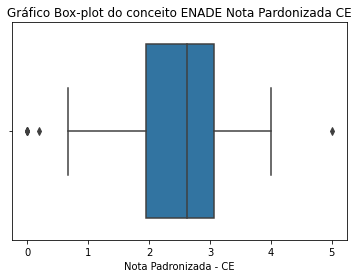

In [ ]:
se.boxplot(dfMedicinaC['Nota Padronizada - CE']).set_title('Gráfico Box-plot do conceito ENADE Nota Pardonizada CE')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gráfico Box-plot do conceito ENADE Nota Pardonizada')

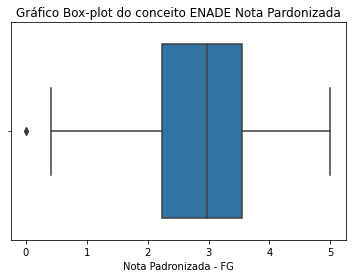

In [ ]:
se.boxplot(dfMedicinaC['Nota Padronizada - FG']).set_title('Gráfico Box-plot do conceito ENADE Nota Pardonizada FG')

In [ ]:
dfMedicinaC['Conceito Enade (Faixa)'][0]

'3'

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


count    176.000000
mean       3.119318
std        0.850191
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Conceito Enade (Faixa), dtype: float64

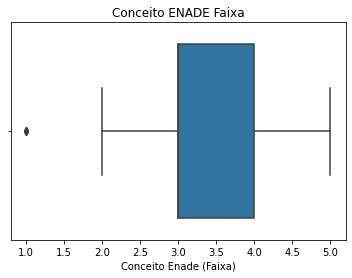

In [ ]:
#Conceito Enade (Faixa)
se.boxplot(dfMedicinaC['Conceito Enade (Faixa)']).set_title('Conceito ENADE Faixa')
dfMedicinaC['Conceito Enade (Faixa)'].describe()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Box-plot do conceito ENADE contínuo')

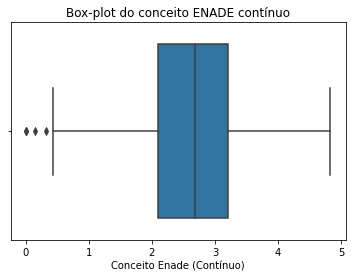

In [ ]:
se.boxplot(dfMedicinaC['Conceito Enade (Contínuo)']).set_title('Gráfico Box-plot do conceito ENADE contínuo de Medicina')



```
# This is formatted as code
```

CO_REGIAO_CURSO
1 = Região Norte (NO)
2 = Região Nordeste (NE)
3 = Região Sudeste (SE)
4 = Região Sul (SUL)
5 = Região Centro-Oeste (CO)

# **ITEM B**


In [15]:
dfMedicinaC.head()

,index,Código da Área,Código da IES,Sigla da IES,Município do Curso,Sigla da UF,Concluintes Inscritos,Concluintes Participantes,Nota Padronizada - FG,Nota Padronizada - CE,Conceito Enade (Contínuo),Conceito Enade (Faixa),Regiao
0,2,12,1,UFMT,CUIABÁ,MT,35,33,3.473179,2.759319,2.937784,3,5
1,8,12,2,UNB,BRASÍLIA,DF,89,85,3.436836,2.841475,2.990315,4,5
2,13,12,3,UFS,ARACAJU,SE,53,53,2.643099,2.658829,2.654896,3,2
3,17,12,4,UFAM,MANAUS,AM,36,35,4.273778,2.299221,2.792860,3,1
4,21,12,5,UFPI,TERESINA,PI,45,45,3.533455,3.565352,3.557378,4,2


In [16]:
# cria variáveis para as colunas
conc_inscritos = dfMedicinaC['Concluintes Inscritos']
conc_participantes = dfMedicinaC['Concluintes Participantes']
nota_fg = dfMedicinaC['Nota Padronizada - FG']
nota_ce = dfMedicinaC['Nota Padronizada - CE']
conceito_cont = dfMedicinaC['Conceito Enade (Contínuo)']
conceito_faixa = dfMedicinaC['Conceito Enade (Faixa)']

In [17]:
# função para calcular simetria
def calc_simetria(media, mediana, moda):
  if (media > mediana):
    return 'ASSIMÉTRICA POSITIVA'
  elif (media < mediana):
    return 'ASSIMÉTRICA NEGATIVA'
  else:
    return 'SIMÉTRICA'

## **B - Variável 'Concluintes Inscritos'**

In [38]:
# Info
conc_inscritos.describe()

count    176.000000
mean      90.017045
std       48.043370
min       20.000000
25%       55.750000
50%       84.000000
75%      108.000000
max      308.000000
Name: Concluintes Inscritos, dtype: float64

In [39]:
# Criar lista
inscritos_array = np.array(conc_inscritos, dtype = float)
print (inscritos_array)

[ 35.  89.  53.  36.  45.  86. 165.  63.  77.  87.  83. 133.  95.  68.
 163.  48. 106.  86.  42.  65.  75. 102.  62.  84. 166. 105.  71. 308.
  77.  85.  93.  96. 105.  47. 148. 114.  55.  76. 102. 108. 174.  88.
  89.  64. 127.  95.  89. 169.  99.  98.  75. 178.  86. 160. 159.  88.
 305. 154.  42.  70. 114.  73. 276. 132.  98. 131. 102.  84. 256. 121.
  75.  44.  95.  84. 117. 160.  63.  87.  25. 133.  53. 217. 109.  47.
  68.  82.  62.  64.  50.  82. 106.  56. 108.  74. 101.  85.  64.  37.
  52.  41.  74.  36.  60.  59.  69. 129.  82. 109.  52. 117.  30. 167.
  52. 101.  33.  72.  36.  50.  28.  88.  28.  99.  87. 173.  47. 138.
 119. 117.  81. 113.  88.  97.  31. 102.  61.  94.  77.  93. 109.  81.
 146.  54.  75. 144.  34. 120.  39. 139.  58. 119.  54.  96.  50.  98.
  74.  63. 110.  74.  75. 104. 105.  51.  49. 124.  76.  44.  30.  38.
  29.  46.  20.  27.  35.  54.  85.  84.]


In [40]:
# Média
ci_media = st.mean(inscritos_array)
ci_media

90.01704545454545

In [41]:
# Mediana
ci_mediana = st.median(inscritos_array)
ci_mediana

84.0

In [42]:
# Moda
ci_moda = st.mode(inscritos_array) # st.multimode(inscritos_array)
ci_moda

75.0

In [43]:
# Desvio-padrão
ci_desvio_padrao = np.std(inscritos_array)
ci_desvio_padrao

47.906688946493844

In [44]:
# Coeficiente de variação
ci_coef_variacao = np.var(inscritos_array)
ci_coef_variacao

2295.0508458161157

A variável é ASSIMÉTRICA POSITIVA



Text(0.5, 1.0, 'Gráfico Box-plot dos concluintes inscritos')

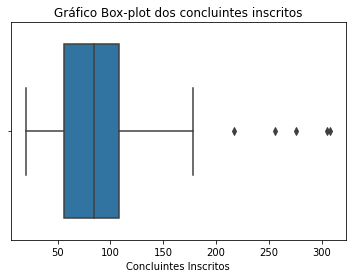

In [45]:
# Simetria
print("A variável é", calc_simetria(ci_media, ci_mediana, ci_moda))
print()
se.boxplot(x = dfMedicinaC['Concluintes Inscritos'], ).set_title('Gráfico Box-plot dos concluintes inscritos')

## **B - Variável 'Concluintes Participantes'**

In [54]:
# Info
conc_participantes.describe()

count    176.000000
mean      88.244318
std       47.072740
min       18.000000
25%       54.750000
50%       83.500000
75%      106.250000
max      303.000000
Name: Concluintes Participantes, dtype: float64

In [55]:
# Criar lista
participantes_array = np.array(conc_participantes, dtype = float)
print (participantes_array)

[ 33.  85.  53.  35.  45.  86. 164.  63.  77.  87.  83. 133.  93.  68.
 162.  47. 106.  86.  42.  65.  75. 102.  62.  83. 163. 105.  71. 297.
  77.  85.  91.  94. 103.  46. 146. 113.  55.  76. 102. 107. 172.  88.
  88.  64. 126.  95.  88. 167.  95.  97.  75. 167.  84. 156. 155.  87.
 303. 149.  41.  69. 111.  72. 275. 129.  98. 126. 101.  84. 254. 116.
  75.  44.  95.  84. 117. 157.  62.  85.  24. 133.  53. 217. 106.  37.
  65.  81.  61.  64.  48.  82. 104.  53. 108.  74.  65.  84.  64.  37.
  52.  39.  74.  34.  60.  59.  68. 127.  82. 108.  52. 115.  30. 164.
  48.  97.  27.  71.  36.  50.  28.  88.  28.  98.  83. 117.  47. 138.
 118. 117.  79. 110.  88.  96.  31. 101.  61.  94.  76.  92. 107.  75.
 142.  54.  75. 142.  34. 120.  38. 139.  58. 116.  53.  96.  49.  96.
  72.  61. 107.  72.  73. 104. 105.  51.  49. 124.  75.  43.  30.  37.
  29.  45.  18.  26.  34.  53.  85.  84.]


In [56]:
# Média
cp_media = st.mean(participantes_array)
cp_media

88.24431818181819

In [57]:
# Mediana
cp_mediana = st.median(participantes_array)
cp_mediana

83.5

In [58]:
# Moda
cp_moda = st.mode(participantes_array) # st.multimode(inscritos_array)
cp_moda

75.0

In [59]:
# Desvio-padrão
cp_desvio_padrao = np.std(participantes_array)
cp_desvio_padrao

46.93881984696711

In [60]:
# Coeficiente de variação
cp_coef_variacao = np.var(participantes_array)
cp_coef_variacao

2203.252808626033

A variável é ASSIMÉTRICA POSITIVA



Text(0.5, 1.0, 'Gráfico Box-plot dos concluintes participantes')

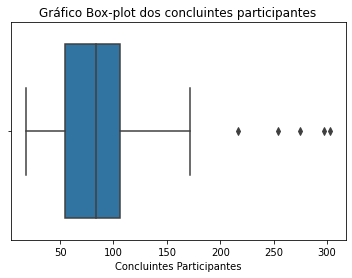

In [61]:
# Simetria
print("A variável é", calc_simetria(media, mediana, moda))
print()
se.boxplot(x = dfMedicinaC['Concluintes Participantes'], ).set_title('Gráfico Box-plot dos concluintes participantes')

#**ITEM D**

In [ ]:
dfMedicina = dfConceito[dfConceito['Código da Área'] == 12]
dfMedicina.head()

,Ano,Código da IES,Nome da IES,Sigla da IES,Organização Acadêmica,Categoria Administrativa,CodCurso,Código da Área,Área de Enquadramento,Modalidade de Ensino,Código do Município,Município do Curso,Sigla da UF,Concluintes Inscritos,Concluintes Participantes,Nota Bruta - FG,Nota Padronizada - FG,Nota Bruta - CE,Nota Padronizada - CE,Conceito Enade (Contínuo),Conceito Enade (Faixa)
2,2016,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,Universidade,Pessoa Jurídica de Direito Público - Federal,12,12,MEDICINA,Educação Presencial,5103403,CUIABÁ,MT,35,33,63.166668,3.473179,68.506058,2.759319,2.937784,3
8,2016,2,UNIVERSIDADE DE BRASÍLIA,UNB,Universidade,Pessoa Jurídica de Direito Público - Federal,140,12,MEDICINA,Educação Presencial,5300108,BRASÍLIA,DF,89,85,63.005882,3.436836,68.930588,2.841475,2.990315,4
13,2016,3,UNIVERSIDADE FEDERAL DE SERGIPE,UFS,Universidade,Pessoa Jurídica de Direito Público - Federal,303,12,MEDICINA,Educação Presencial,2800308,ARACAJU,SE,53,53,59.494339,2.643099,67.986794,2.658829,2.654896,3
17,2016,4,UNIVERSIDADE FEDERAL DO AMAZONAS,UFAM,Universidade,Pessoa Jurídica de Direito Público - Federal,389,12,MEDICINA,Educação Presencial,1302603,MANAUS,AM,36,35,66.708572,4.273778,66.128571,2.299221,2.792860,3
21,2016,5,UNIVERSIDADE FEDERAL DO PIAUÍ,UFPI,Universidade,Pessoa Jurídica de Direito Público - Federal,484,12,MEDICINA,Educação Presencial,2211001,TERESINA,PI,45,45,63.433334,3.533455,72.671112,3.565352,3.557378,4


In [ ]:
dfMedicina["Conceito Enade (Faixa)"] = pd.to_numeric(dfMedicina['Conceito Enade (Faixa)'], errors='coerce')

In [ ]:
qtdMedicina = len(dfMedicina)
print("Quantidade de Universidades com medicina: ", qtdMedicina)

MediaConceitoEnade = dfMedicina['Conceito Enade (Faixa)'].mean() 
print("Média geral(Medicina) do conceito ENADE: ", round(MediaConceitoEnade,3))

DesvioConceitoEnade = dfMedicina.loc[:,"Conceito Enade (Faixa)"].std()
print("Desvio padrão geral(Medicina) do conceito ENADE: ", round(DesvioConceitoEnade,3))

In [ ]:
#Intervalo de Confiança ao nível de 95%;
print("Intervalo de Confiança ao nível de 95% para média quando a variância é desconhecida")
inf,sup = t.interval(0.95, qtdMedicina-1, loc=MediaConceitoEnade, scale=DesvioConceitoEnade/np.sqrt(qtdMedicina))
print ('Limite inferior 95%:', round(inf,3))
print ('Limite superior 95%:', round(sup,3))


In [ ]:
# Número de amostras, para ERRO máximo de 10%
n = (t.ppf(0.025,qtdMedicina-1)**2)*(st.stdev(x)**2)/(0.01**2)
print("Tamanho da amostra =",round(n))

In [ ]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [ ]:
dfMedicina.iloc[:,20]

In [ ]:
mean_confidence_interval(dfMedicina.iloc[:100,20])